In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import plotly.express as px

from shutil import copyfile
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input,Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", tf.test.is_gpu_available())

Num GPUs Available:  True


In [3]:
#Define data path
CAT_DIR = './PetImages/Cat'
DOG_DIR = './PetImages/Dog'

# try:
#     os.makedirs(r'./tmp/cats-v-dogs')
#     os.makedirs(r'./tmp/cats-v-dogs/training')
#     os.makedirs(r'./tmp/cats-v-dogs/validation')
#     os.makedirs(r'./tmp/cats-v-dogs/training/cats')
#     os.makedirs(r'./tmp/cats-v-dogs/training/dogs')
#     os.makedirs(r'./tmp/cats-v-dogs/validation/cats')
#     os.makedirs(r'./tmp/cats-v-dogs/validation/dogs')
# except OSError:
#     print('Error failed to make directory')

In [4]:
class_names = ['Cat', 'Dog'] 

n_dogs = len(os.listdir('PetImages/Dog'))
n_cats = len(os.listdir('PetImages/Cat'))
n_images = [n_cats, n_dogs]
px.pie(names=class_names, values=n_images)

In [5]:
def split_data(main_dir, training_dir, validation_dir, split_size):
    files = []
    for file in os.listdir(main_dir):
        if  os.path.getsize(os.path.join(main_dir, file)):
            files.append(file)

    shuffled_files = random.sample(files,  len(files))
    split = int(split_size * len(shuffled_files))

    train = shuffled_files[:split]
    validation = shuffled_files[split:]

    for element in train:
        copyfile(os.path.join(main_dir,  element), os.path.join(training_dir, element))

    for element in validation:
        copyfile(os.path.join(main_dir,  element), os.path.join(validation_dir, element))

In [6]:


# split_data(CAT_DIR, 'tmp/cats-v-dogs/training/cats','tmp/cats-v-dogs/validation/cats', 0.9)
# split_data(DOG_DIR, 'tmp/cats-v-dogs/training/dogs', 'tmp/cats-v-dogs/validation/dogs', 0.9)


In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory('tmp/cats-v-dogs/training',
                                                    batch_size = 64,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     


validation_generator =  valid_datagen.flow_from_directory( 'tmp/cats-v-dogs/validation',
                                                          batch_size  = 64,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 24752 images belonging to 2 classes.
Found 4753 images belonging to 2 classes.


In [8]:
def plot_data(generator, n_images):
    i = 1
    images, labels = generator.next()
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('on')
        i += 1
        if i == n_images:
            break
    
    plt.show()

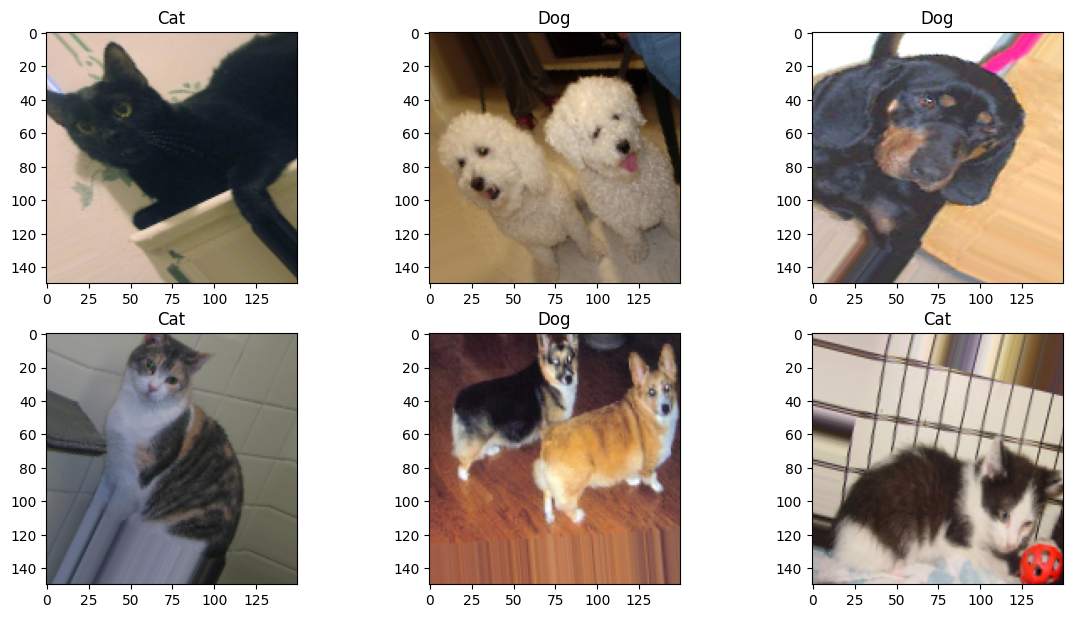

In [9]:
plot_data(train_generator, 7)

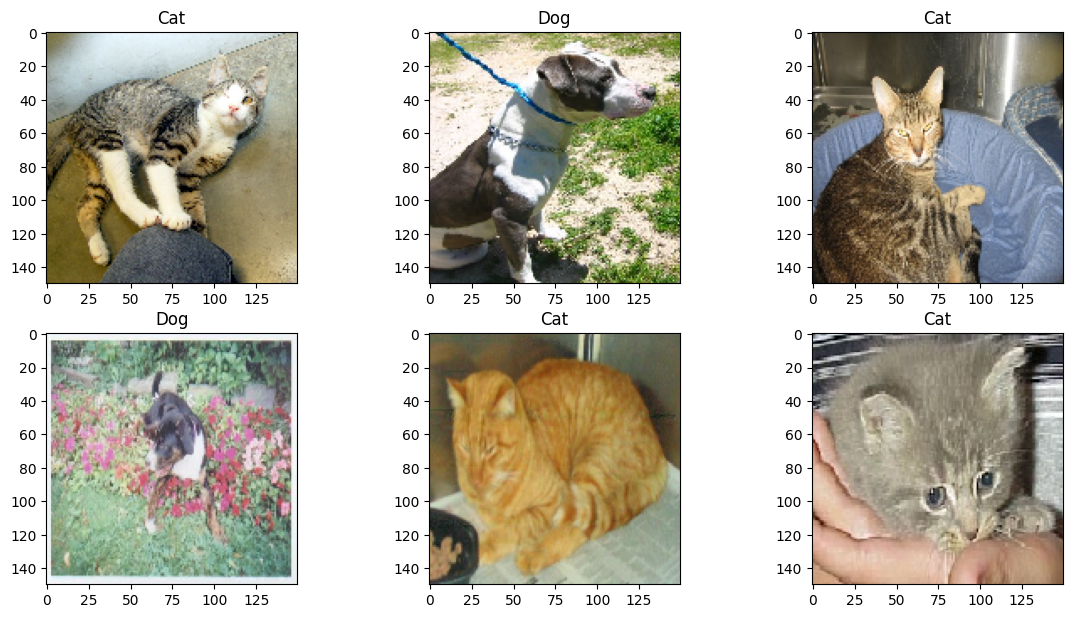

In [10]:

plot_data(validation_generator, 7)

In [17]:
model = tf.keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(tf.keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit_generator(train_generator,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = validation_generator
)

Epoch 1/10
 24/250 [=>............................] - ETA: 1:35 - loss: 0.6975 - acc: 0.4980

c:\Users\merda\Anaconda3\envs\directml_python3.7\lib\site-packages\PIL\TiffImagePlugin.py:850: UserWarning:

Truncated File Read



250/250 [==============================] - 133s 534ms/step - loss: 0.6818 - acc: 0.5526 - val_loss: 0.6471 - val_acc: 0.6190
Epoch 2/10
250/250 [==============================] - 137s 549ms/step - loss: 0.6534 - acc: 0.6005 - val_loss: 0.6169 - val_acc: 0.6432
Epoch 3/10
250/250 [==============================] - 144s 576ms/step - loss: 0.6206 - acc: 0.6526 - val_loss: 0.5544 - val_acc: 0.7103
Epoch 4/10
250/250 [==============================] - 136s 543ms/step - loss: 0.5828 - acc: 0.6856 - val_loss: 0.5252 - val_acc: 0.7469
Epoch 5/10
250/250 [==============================] - 140s 561ms/step - loss: 0.5596 - acc: 0.7085 - val_loss: 0.4935 - val_acc: 0.7583
Epoch 6/10
250/250 [==============================] - 147s 589ms/step - loss: 0.5408 - acc: 0.7255 - val_loss: 0.4491 - val_acc: 0.7869
Epoch 7/10
250/250 [==============================] - 129s 514ms/step - loss: 0.5223 - acc: 0.7406 - val_loss: 0.4432 - val_acc: 0.8014
Epoch 8/10
250/250 [==============================] - 135s 

In [21]:
def plot_prediction(generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    # Get the images and the labels from the generator
    images, labels = generator.next()
    # Gets the model predictions
    preds = model.predict(images)
    # print(preds)
    predictions = np.argmax(preds, axis=1)
    # print(predictions)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(f"{class_names[label]}")
            plt.setp(title_obj, color='g') 
            plt.axis('on')
        else:
            title_obj = plt.title(f"{class_names[label]}")
            plt.setp(title_obj, color='r') 
            plt.axis('on')
        
        # print(f"[INFO] {class_names[label]}: {preds[i][0]:.2f}")
        i += 1
        if i == n_images:
            break
       
    
    plt.show()

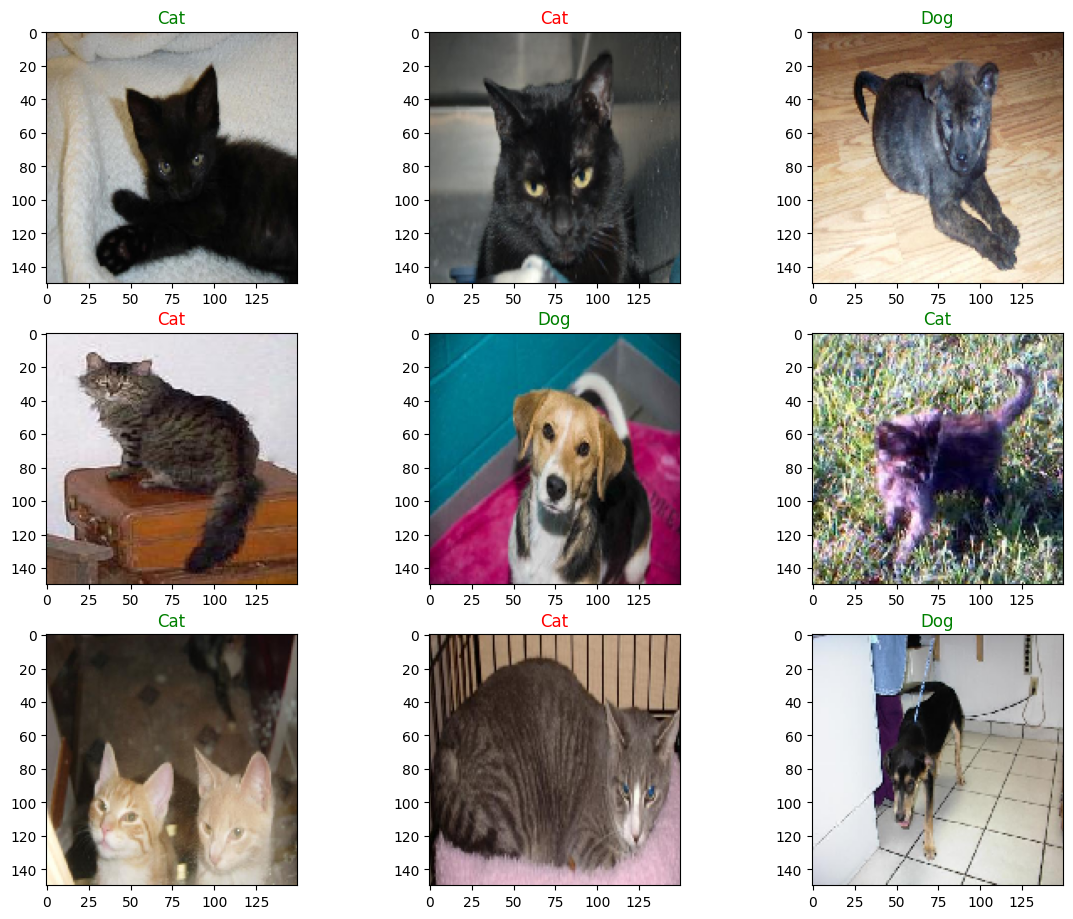

In [22]:
plot_prediction(validation_generator, 10)

In [23]:
results = pd.DataFrame(history.history)
results.tail()

,loss,acc,val_loss,val_acc
5,0.540808,0.725538,0.449132,0.786871
6,0.522240,0.740616,0.443160,0.801389
7,0.504645,0.749750,0.466722,0.772354
8,0.479635,0.770896,0.433871,0.798443
9,0.459409,0.781969,0.466380,0.771933


In [24]:
fig = px.line(results,y=[results['acc'],results['val_acc']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(   
    title_font_color="#fad25a", 
    xaxis=dict(color="#fad25a",title='Epochs'), 
    yaxis=dict(color="#fad25a")
 )
fig.show()

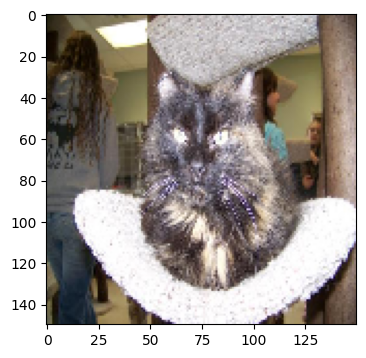

Predicted Class (0 - Dog , 1- Cat):  0.6549918


In [25]:
image = load_img('./tmp/cats-v-dogs/validation/cats/11180.jpg', target_size=(150, 150))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,150,150,3)
label = model.predict(img)
plt.figure(figsize=(4, 5))
plt.imshow(image)
plt.show()
print("Predicted Class (0 - Dog , 1- Cat): ", label[0][0])